In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
# Load the Apple stock data
data_path = "/content/AAPL.csv"
df = pd.read_csv(data_path)

# Display the first few rows to understand the structure of the data
print(df.head())



         Date       Low      Open     Volume      High     Close  \
0  12-12-1980  0.128348  0.128348  469033600  0.128906  0.128348   
1  15-12-1980  0.121652  0.122210  175884800  0.122210  0.121652   
2  16-12-1980  0.112723  0.113281  105728000  0.113281  0.112723   
3  17-12-1980  0.115513  0.115513   86441600  0.116071  0.115513   
4  18-12-1980  0.118862  0.118862   73449600  0.119420  0.118862   

   Adjusted Close  
0        0.099874  
1        0.094663  
2        0.087715  
3        0.089886  
4        0.092492  


In [ ]:
# Check for missing values in the dataset
print(df.isna().sum())

# Drop rows with missing values if necessary
df.dropna(inplace=True)


Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64


In [ ]:
# Convert the 'Date' column to DateTime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)


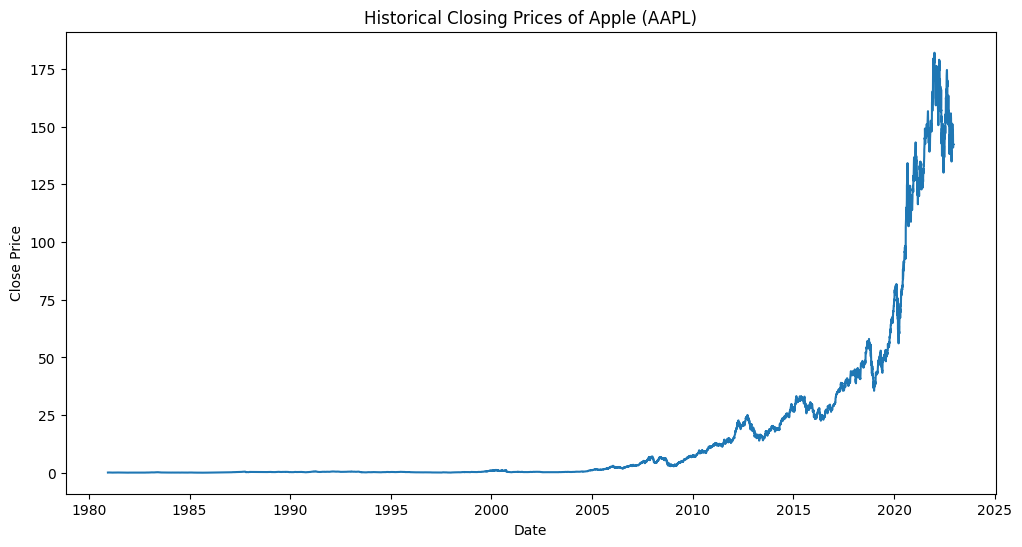

In [ ]:
import matplotlib.pyplot as plt

# Plot the 'Close' price to visualize historical trends
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Historical Closing Prices of Apple (AAPL)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
# Extract the 'Close' price values
close_prices = df['Close'].values
close_prices = close_prices.reshape(-1, 1)  # Reshape to a 2D array for scaler


In [ ]:
# Initialize the MinMaxScaler with a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the 'Close' price data
scaled_data = scaler.fit_transform(close_prices)


In [ ]:
# Define the training data size (80% of the total data)
train_size = int(len(scaled_data) * 0.8)

# Define the test data size (remaining 20%)
test_size = len(scaled_data) - train_size


In [ ]:
# Split the scaled data into training and testing sets
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data), :]


In [ ]:
import numpy as np

def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)


In [ ]:
# Create sequences for the training data
X_train, y_train = create_dataset(train_data)


In [ ]:
# Create sequences for the testing data
X_test, y_test = create_dataset(test_data)


In [ ]:
# Reshape the input data to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Initialize the RNN model
model = tf.keras.Sequential()



In [ ]:
# Add the first LSTM layer (return_sequences=True so we can stack another LSTM)
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add the second LSTM layer (does not return sequences)
model.add(tf.keras.layers.LSTM(50, return_sequences=False))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Add a dense layer with 25 units
model.add(tf.keras.layers.Dense(25))

# Add the final output layer with 1 unit
model.add(tf.keras.layers.Dense(1))


In [ ]:
# Compile the model using Adam optimizer and mean squared error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 5.5654e-05 - val_loss: 0.0015
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - loss: 3.1954e-06 - val_loss: 8.3488e-04
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - loss: 3.4543e-06 - val_loss: 0.0017
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 3.0431e-06 - val_loss: 4.3920e-04
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - loss: 4.7976e-06 - val_loss: 0.0024
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - loss: 2.2356e-06 - val_loss: 0.0012
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - loss: 2.6890e-06 - val_loss: 3.1282e-04
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - loss: 2.9452e-06 - val_loss: 9.7305e-04
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 1.8478e-06 - val_loss: 6.2906e-04
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 2.0256e-06 - val_loss: 5.8555e-04
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step 

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(X_test)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


In [ ]:
# Inverse transform the predictions to get actual values
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual y_test values to get the original values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


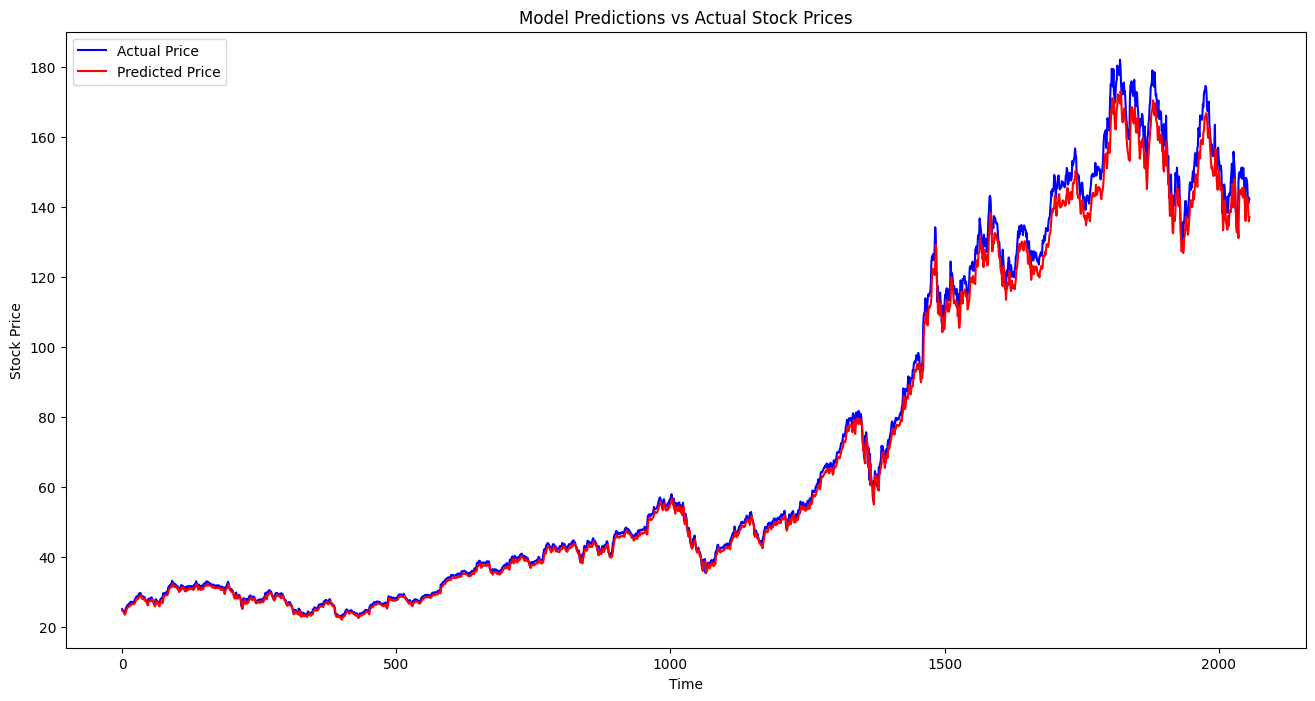

In [ ]:
# Plot the predictions against the actual values
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Model Predictions vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 3.487131731120032
Mean Absolute Error (MAE): 2.2996492195778466


In [ ]:
# Initialize the LSTM model
model = tf.keras.Sequential()

# Add the first LSTM layer with increased units and Dropout
model.add(tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))  # Add Dropout

# Add the second LSTM layer with increased units and Dropout
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))  # Add Dropout

# Add a dense layer with 25 units
model.add(tf.keras.layers.Dense(25))

# Add the final output layer with 1 unit
model.add(tf.keras.layers.Dense(1))

# Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Set a lower learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up EarlyStopping to prevent over-training if no improvement is seen
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the updated LSTM model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - loss: 5.9906e-06 - val_loss: 7389.9565
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - loss: 6.4479e-06 - val_loss: 7388.6582
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - loss: 6.5525e-06 - val_loss: 7393.0391
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - loss: 5.4709e-06 - val_loss: 7395.5054
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - loss: 6.5532e-06 - val_loss: 7388.0562
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - loss: 6.7347e-06 - val_loss: 7389.1699
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - loss: 5.6964e-06 - val_loss: 7396.3223
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - loss: 6.8952e-06 - val_loss: 7388.8521
Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - loss: 5.9630e-06 - val_loss: 7391.6880
Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - loss: 5.3584e-06 - val_loss: 7393.1353
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 26

In [ ]:
# Plot the updated LSTM predictions against the actual values
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='LSTM Predicted Price', color='red')
plt.title('Updated LSTM Model Predictions vs Actual Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for the updated LSTM model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE for the updated LSTM model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - loss: 2.2687e-06 - val_loss: 7386.0640
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - loss: 1.4799e-06 - val_loss: 7390.6348
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - loss: 1.9000e-06 - val_loss: 7389.2935
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - loss: 1.6653e-06 - val_loss: 7389.4399
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 152ms/step - loss: 1.7424e-06 - val_loss: 7388.4331
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - loss: 1.5488e-06 - val_loss: 7388.2358
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - loss: 1.5912e-06 - val_loss: 7389.5483
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - loss: 1.2937e-06 - val_loss: 7389.3379
Epoch 9/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - loss: 2.3187e-06 - val_loss: 7389.2793
Epoch 10/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 158ms/step - loss: 1.5316e-06 - val_loss: 7388.4946
Epoch 11/30
263/263 ━━━━━━━━━━━━━━━━━━━